In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import time

from IPython.display import clear_output
import plotly.express as px

In [2]:
output_file = "test.csv"
history_file = "history.csv"

speedtest_name = "speedtest"  # .exe"
options = f"--output-header -f csv > {output_file}"


In [3]:

def run_speedtest(speedtest_name: str, options: str) -> pd.DataFrame:
    print("Testing")

    # kickoff the CLI speedtest
    try:
        os.system(f"{speedtest_name} {options}")
    except Exception as e:
        print(str(e))
        return None

    # loadup the results from speedtest and add the current date-time
    try:
        data_df = pd.read_csv(output_file)
        data_df['date'] = [dt.datetime.now()]
        return data_df
    except Exception as e:
        # no results in output file from Speedtest.  Happens occasionally
        print(str(e))
        return None


def update_history_df(data_df: pd.DataFrame, history_file: str) -> pd.DataFrame:
    try:
        history_df = pd.read_csv(history_file)
        history_df = pd.concat([history_df, data_df], axis=0)
    except:
        history_df = data_df

    history_df.to_csv(history_file, index=False)
    
    return history_df


def show_updated_speed(history_df: pd.DataFrame) -> None:
    plot_df = history_df[['date', 'download']].rename({'download': 'mbps'}, axis=1)
    plot_df["type"] = "down"
    
    upload_df = history_df[['date', 'upload']].rename({'upload': 'mbps'}, axis=1)
    upload_df["type"] = "up"
    
    plot_df = pd.concat([plot_df, upload_df], axis=0)
    
    # convert from MBps to Mbps (2nd one is what everyone tells you you're getting)
    plot_df.loc[:, 'mbps'] *= 8 / 1e6
    
    fig = px.line(plot_df, x='date', y='mbps', color='type')
    fig.show()
    
    print(history_df[['download', 'upload']].describe())

    return None

60/60 -- Waiting for 0.0 seconds


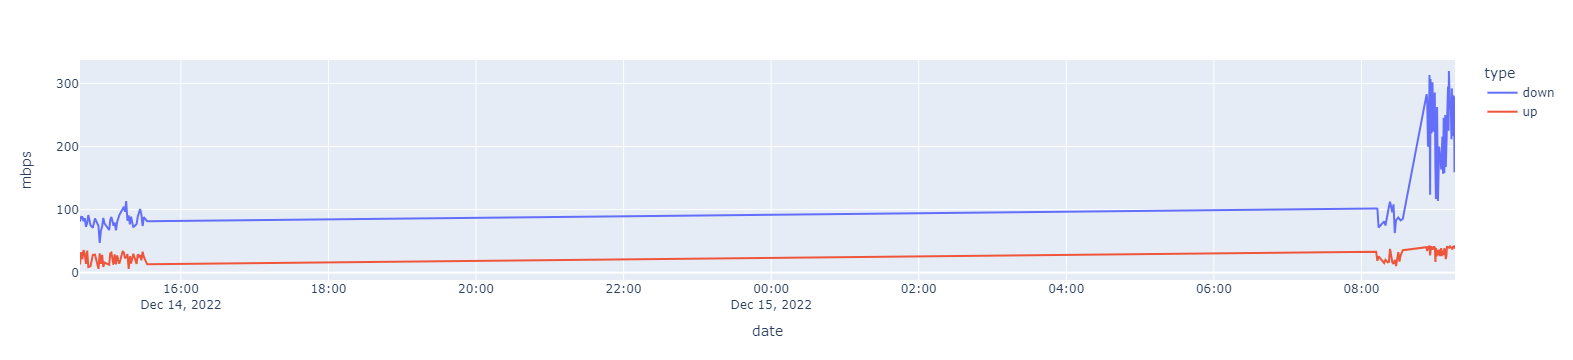

           download        upload
count  1.170000e+02  1.170000e+02
mean   2.005176e+07  3.718239e+06
std    1.059969e+07  1.317417e+06
min    5.904491e+06  7.211940e+05
25%    1.062817e+07  2.683748e+06
50%    1.418876e+07  3.944651e+06
75%    3.070000e+07  4.954428e+06
max    3.996117e+07  5.369362e+06
Done


In [4]:
wait = 0.0 # min
loops = 60

for i in range(loops):
    print(i+1, ")", dt.datetime.now())

    data_df = run_speedtest(speedtest_name, options)
    if data_df is None:
        print("No results returned")
    else:
        history_df = update_history_df(data_df, history_file)
    
    if i < loops:
        clear_output(wait=False)
        print(f"{i+1}/{loops} -- Waiting for {wait*60} seconds")
        time.sleep(wait * 60)

    show_updated_speed(history_df)

print("Done")

### Rechart

In [ ]:
# show_updated_speed(history_df)